<h1> <center> Assignemnt 1 </center>
 <center> Big Data Systems and Intelligence Analystics </center> </h1> 

# PART - A -- Get Some Data (25 points)

<h2>  Bank Marketing Prediction </h2> 

A Data-Driven Approach to Predict the Success of Bank Telemarketing. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

The data has 41188 rows with 20 input and 1 output columns. The dataset size is 5.7 MB.

The Data Types

| Data Types | Column Count |
| --- | --- | --- |
| Continuous | 10 | 
| Categorical | 10 | 
| Nominal | 1 | 

Importing Libraries

In [191]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 7)
import seaborn as sns
from termcolor import colored
from IPython.core import display as ICD
import warnings
warnings.filterwarnings('ignore')

Importing the data to the dataframe with proper column names 

In [192]:
bank_rawdata = pd.read_csv('bank-additional-full.csv', sep = ';', header = None)
bank_rawdata.columns = bank_rawdata.iloc[0]
bank_data = bank_rawdata.reindex(bank_rawdata.index.drop(0))
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
5,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


 --- All the columns are contributing for the analysis so none are removed

## Exploratory Data Analysis

Converting the numeric columns to its data types

In [193]:
bank_data = bank_data.convert_objects(convert_numeric=True)
bank_data.dtypes

0
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

To understand the key details of the data like to total counts, count of unique values, 
most repeated data, most frequency count 

In [102]:
bank_data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


To check the info of every columns like datatype and whether they have null values or not

In [103]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 1 to 41188
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

--- This above results shows there is no null values in the data 

Provides the dimensionality of the dataframe

In [104]:
bank_data.shape

(41188, 21)

Provides the data category and its count on a column

In [105]:
bank_data['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

There is no Null values but we could see a string 'unknown'

In [106]:
bank_data.loc[bank_data.marital == 'unknown', 'marital'].count()

80

### There are no Null values but there are some unknown value
### Displays columns which has number of unknown string values

In [194]:
print((bank_data == 'unknown').sum())

0
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


###  All unknown values are replaced with mode value of the column  

In [195]:
bank_data['job'] = bank_data['job'].replace('unknown',''.join(list(bank_data.job.mode())))
bank_data['marital'] = bank_data['marital'].replace('unknown',''.join(list(bank_data.marital.mode())))
bank_data['education'] = bank_data['education'].replace('unknown',''.join(list(bank_data.education.mode())))
bank_data['default'] = bank_data['default'].replace('unknown',''.join(list(bank_data.default.mode())))
bank_data['housing'] = bank_data['housing'].replace('unknown',''.join(list(bank_data.housing.mode())))
bank_data['loan'] = bank_data['loan'].replace('unknown',''.join(list(bank_data.loan.mode())))
bank_data['y'] = bank_data['y'].replace('yes',1)
bank_data['y'] = bank_data['y'].replace('no',0)
(bank_data == 'unknown').sum()

0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Displays only the selected columns for short observation

In [123]:
bank_data[['marital','job']].head()

,marital,job
1,married,housemaid
2,married,services
3,married,services
4,married,admin.
5,married,services


### To identify the distribution of data

The distribution of a statistical data set (or a population) is a listing or function showing all the possible values (or intervals) of the data and how often they occur. When a distribution of categorical data is organized, you see the number or percentage of individuals in each group.

In [196]:
categorial = ["marital", "job", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]
for x in categorial:
    print(colored('\033[1m'+x.upper(),'blue') + ' column data distribution over the dependent variable TERM DEPOSIT')
    abc = pd.crosstab(index=bank_data["y"],columns=bank_data[x])   
    abc = abc.rename_axis('Term Deposit')
    abc['Total'] = abc.sum(axis=1)
    ICD.display(abc)

MARITAL column data distribution over the dependent variable TERM DEPOSIT


marital,divorced,married,single,Total
Term Deposit,,,,
0,4136,22464,9948,36548
1,476,2544,1620,4640


JOB column data distribution over the dependent variable TERM DEPOSIT


job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,Total
Term Deposit,,,,,,,,,,,,
0,9363,8616,1332,954,2596,1286,1272,3646,600,6013,870,36548
1,1389,638,124,106,328,434,149,323,275,730,144,4640


EDUCATION column data distribution over the dependent variable TERM DEPOSIT


education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,Total
Term Deposit,,,,,,,,
0,3748,2104,5572,8484,14,4648,11978,36548
1,428,188,473,1031,4,595,1921,4640


DEFAULT column data distribution over the dependent variable TERM DEPOSIT


default,no,yes,Total
Term Deposit,,,
0,36545,3,36548
1,4640,0,4640


HOUSING column data distribution over the dependent variable TERM DEPOSIT


housing,no,yes,Total
Term Deposit,,,
0,16596,19952,36548
1,2026,2614,4640


LOAN column data distribution over the dependent variable TERM DEPOSIT


loan,no,yes,Total
Term Deposit,,,
0,30983,5565,36548
1,3957,683,4640


CONTACT column data distribution over the dependent variable TERM DEPOSIT


contact,cellular,telephone,Total
Term Deposit,,,
0,22291,14257,36548
1,3853,787,4640


MONTH column data distribution over the dependent variable TERM DEPOSIT


month,apr,aug,dec,jul,jun,mar,may,nov,oct,sep,Total
Term Deposit,,,,,,,,,,,
0,2093,5523,93,6525,4759,270,12883,3685,403,314,36548
1,539,655,89,649,559,276,886,416,315,256,4640


DAY_OF_WEEK column data distribution over the dependent variable TERM DEPOSIT


day_of_week,fri,mon,thu,tue,wed,Total
Term Deposit,,,,,,
0,6981,7667,7578,7137,7185,36548
1,846,847,1045,953,949,4640


POUTCOME column data distribution over the dependent variable TERM DEPOSIT


poutcome,failure,nonexistent,success,Total
Term Deposit,,,,
0,3647,32422,479,36548
1,605,3141,894,4640


The data distribution on every categorical column shows that the frequency of the dependent variable has been spread widely on all values of the variables. Its seems that number of customers who has term deposits are less than the customers who dont have deposits. 

### Pie chart representation of data distribution on Contact and Job variable 

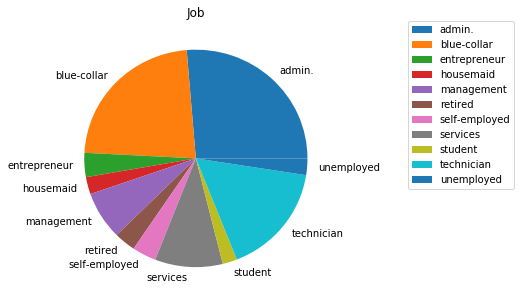

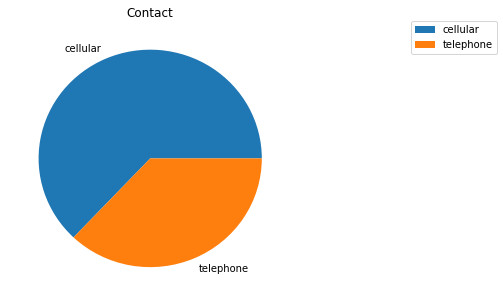

In [226]:
job = pd.crosstab(index=bank_data["job"],columns='asd')
plot = job.plot.pie(y='asd', figsize=(5, 5), label = '')
plt.legend(bbox_to_anchor=(1.66,1.025), loc="upper right")
plt.title('Job')
plt.show()
contact = pd.crosstab(index=bank_data["contact"],columns='qwe')
plot = contact.plot.pie(y='qwe', figsize=(5, 5), label = '')
plt.legend(bbox_to_anchor=(1.76,1.025), loc="upper right")
plt.title('Contact')
plt.show()

The above two pie chart represents the frequency distribution of every value in the column Job and Contact. This helps us to understand how Bank's marketing transaction over the term deposit has been distributed

### Method to indentify the outliers

In [198]:
def find_outlier(x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    iqr = q3 - q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices,outlier_values

Prints the list of ouliers in the column duration

In [199]:
tukey_ind, tukey_values = find_outlier(bank_data['duration']) 
print(((np.sort(tukey_values))))

[ 645  645  645 ... 3785 4199 4918]


Creating a empty dataframe to play outliers

In [200]:
Outlier = pd.DataFrame(columns=['ColumnName','OutlierFreq'])
Outlier

,ColumnName,OutlierFreq


Using find outlier methods the outliers are indentified and stored in dataframe

In [201]:
print("The Outlier columns and its frequecy :")
tukey_ind, tukey_values = find_outlier(bank_data['age']) 
print('age \t\t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[1] = ['age',len(np.sort(tukey_values))]
tukey_ind, tukey_values = find_outlier(bank_data['duration']) 
print('duration \t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[2] = ['duration',len(np.sort(tukey_values))]
tukey_ind, tukey_values = find_outlier(bank_data['campaign']) 
print('campaign \t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[3] = ['campaign',len(np.sort(tukey_values))]
tukey_ind, tukey_values = find_outlier(bank_data['pdays']) 
print('pdays \t\t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[4] = ['pdays',len(np.sort(tukey_values))]
tukey_ind, tukey_values = find_outlier(bank_data['emp.var.rate']) 
print('emp.var.rate \t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[5] = ['emp.var.rate',len(np.sort(tukey_values))]
tukey_ind, tukey_values = find_outlier(bank_data['cons.price.idx']) 
print('cons.price.idx \t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[6] = ['cons.price.idx',len(np.sort(tukey_values))]
tukey_ind, tukey_values = find_outlier(bank_data['cons.conf.idx']) 
print('cons.conf.idx \t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[7] = ['cons.conf.idx',len(np.sort(tukey_values))]
tukey_ind, tukey_values = find_outlier(bank_data['euribor3m']) 
print('euribor3m \t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[8] = ['euribor3m',len(np.sort(tukey_values))]
tukey_ind, tukey_values = find_outlier(bank_data['nr.employed']) 
print('nr.employed \t\t'+ str(len(np.sort(tukey_values))))
Outlier.loc[9] = ['nr.employed',len(np.sort(tukey_values))]

The Outlier columns and its frequecy :
age 			469
duration 		2963
campaign 		2406
pdays 			1515
emp.var.rate 		0
cons.price.idx 		0
cons.conf.idx 		447
euribor3m 		0
nr.employed 		0


### The Outliers on every column are displayed in Bar chart with its frequency 

Text(0.5,1,'Outlier Coulmns and its Frequency')

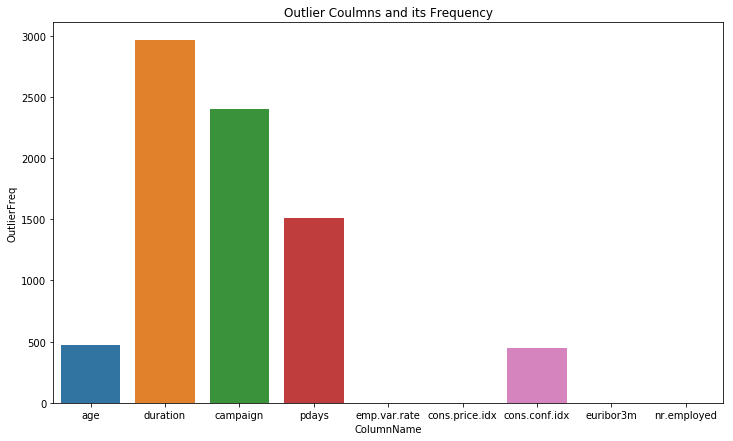

In [202]:
plt.rcParams['figure.figsize'] = (12, 7)
sns.barplot( x ='ColumnName', y="OutlierFreq", data=Outlier) 
plt.title("Outlier Coulmns and its Frequency")

From the above bar chart it seems that the columns - duration, campaign and pdays have high number of outliers and the columns age and cons.conf.idx also has some low count of outliers. 



### Histogram and density plots show the distribution of a single variable 'age' - Before removing outlier

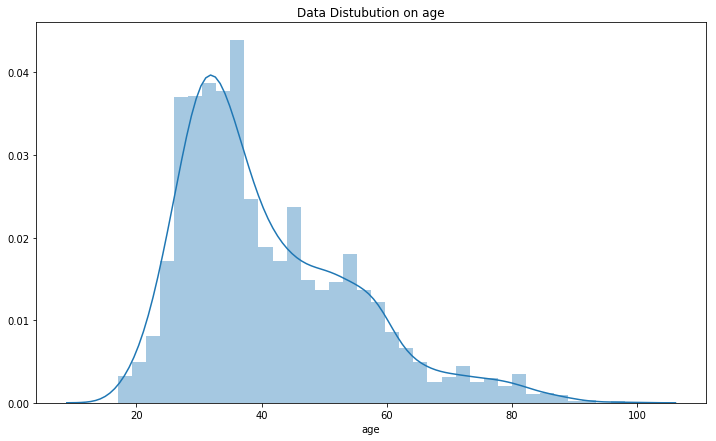

In [203]:
# The column age has been distributed in histogram graph for only people with term deposit 
sns.distplot(bank_data.loc[bank_data['y'] == 1]['age'])
plt.title("Data Distubution on age")
plt.show()

You can see that the trend line of the chart dipping from 70 and more than 100

### Box plots show the distribution of a single variable 'consumer confidence index' - Before removing outlier

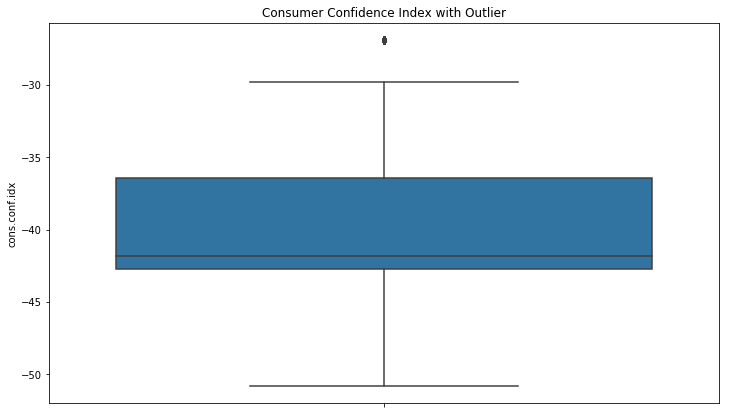

In [204]:
sns.boxplot( y="cons.conf.idx", data=bank_data) 
plt.title('Consumer Confidence Index with Outlier')
plt.show()

You can see there is an outlier point on top of the box plot

###### Deleting three columns which has extreme outliers 

In [205]:
if 'duration' in bank_data:
    del bank_data['duration']
if 'campaign' in bank_data:    
    del bank_data['campaign']
if 'pdays' in bank_data:
    del bank_data['pdays']
print('Once the outlier columns has been removed the total count of the column is ' + str(len(bank_data.columns)))

Once the outlier columns has been removed the total count of the column is 18


###### Deleting the records from the dataframe which has outliers 

In [206]:
tukey_ind, tukey_values = find_outlier(bank_data['age']) 
ageOUT = np.sort(tukey_values)
tukey_ind, tukey_values = find_outlier(bank_data['cons.conf.idx']) 
conOUT = np.sort(tukey_values)
ageOUTu = list(set(ageOUT))
conOUTu = list(set(conOUT))
conOUTu
for x in ageOUTu:
    bank_data = bank_data[bank_data.age != x]
for x in conOUTu:
    bank_data = bank_data[bank_data['cons.conf.idx'] != x]
print('Once the outlier has been removed the total count of the record is ' + str(len(bank_data)))

Once the outlier has been removed the total count of the record is 40327


### Histogram and density plots show the distribution of a single variable 'age' - After removing outlier

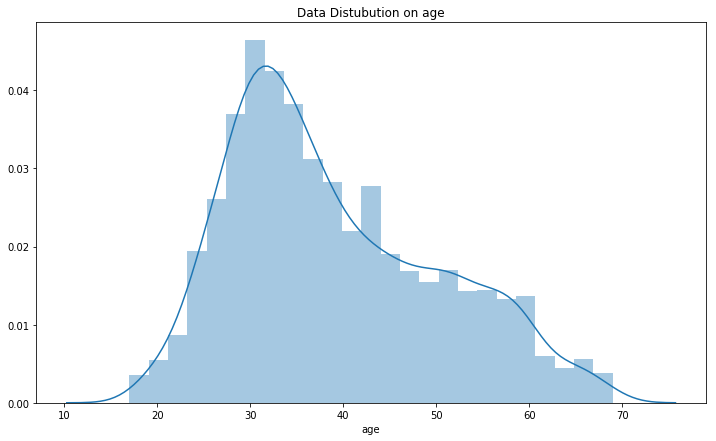

In [207]:
# The column age has been distributed in histogram graph for only people with term deposit 
sns.distplot(bank_data.loc[bank_data['y'] == 1]['age'])
plt.title("Data Distubution on age")
plt.show()

The data distribution of the column age is displayed after the outlier has been removed

### Box plots show the distribution of a single variable 'consumer confidence index' - After removing outlier

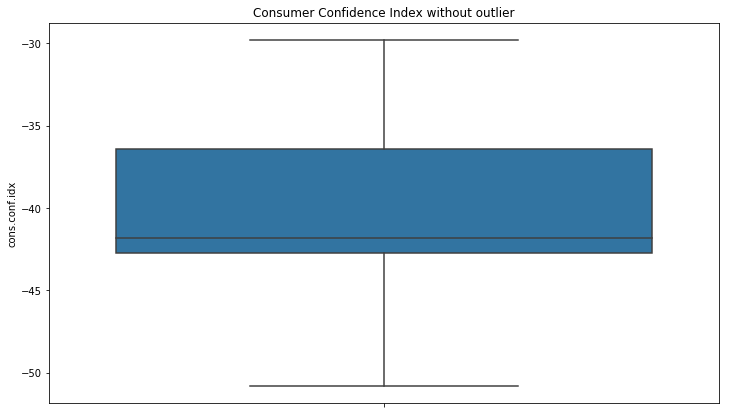

In [208]:
sns.boxplot( y="cons.conf.idx", data=bank_data) 
plt.title('Consumer Confidence Index without outlier')
plt.show()

The data distribution of the column consumer confidence index is displayed after the outlier has been removed

### To indentify Columns Correlation 

0                    age  previous  emp.var.rate  cons.price.idx  \
0                                                                  
age             1.000000 -0.022988      0.075353        0.040243   
previous       -0.022988  1.000000     -0.423054       -0.203685   
emp.var.rate    0.075353 -0.423054      1.000000        0.767080   
cons.price.idx  0.040243 -0.203685      0.767080        1.000000   
cons.conf.idx   0.105116 -0.088434      0.313614        0.150079   
euribor3m       0.086808 -0.455217      0.973282        0.683118   
nr.employed     0.071691 -0.503541      0.903875        0.509086   

0               cons.conf.idx  euribor3m  nr.employed  
0                                                      
age                  0.105116   0.086808     0.071691  
previous            -0.088434  -0.455217    -0.503541  
emp.var.rate         0.313614   0.973282     0.903875  
cons.price.idx       0.150079   0.683118     0.509086  
cons.conf.idx        1.000000   0.376713     0.2024

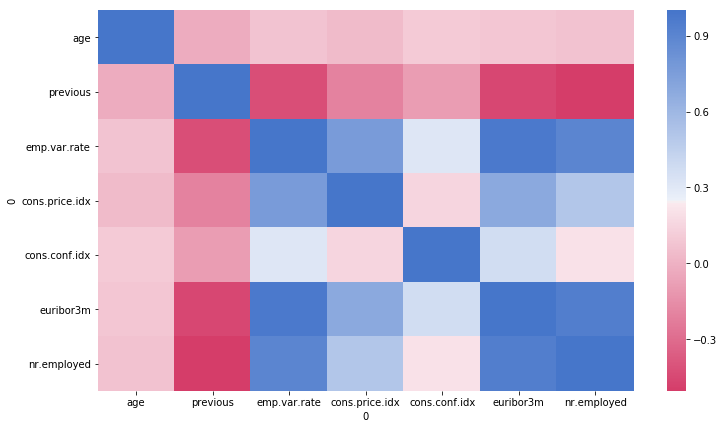

In [209]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations=bank_data[['age','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)

We could see that there are several blue box on the heat map which indicates that those corresponding columns has high correlations and the red boxes proves that there are less correlation between certain columns 

### Further analysis on the data 

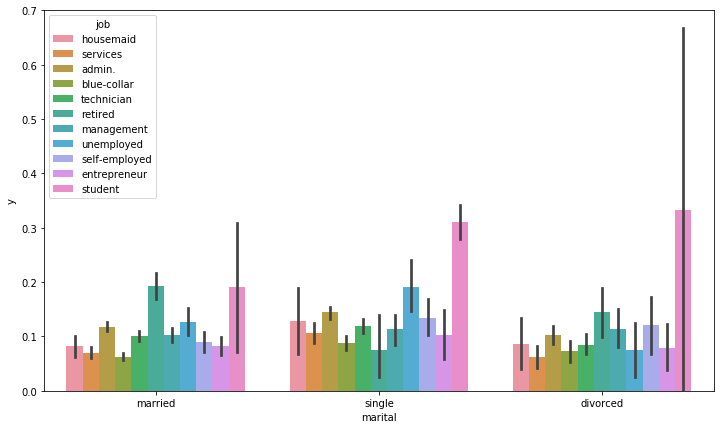

In [222]:
sns.barplot(x="marital", y="y", hue="job", data=bank_data)

The above chart shows that there is a spike on the student side on all three marital status, which shows they have high transaction on term deposit

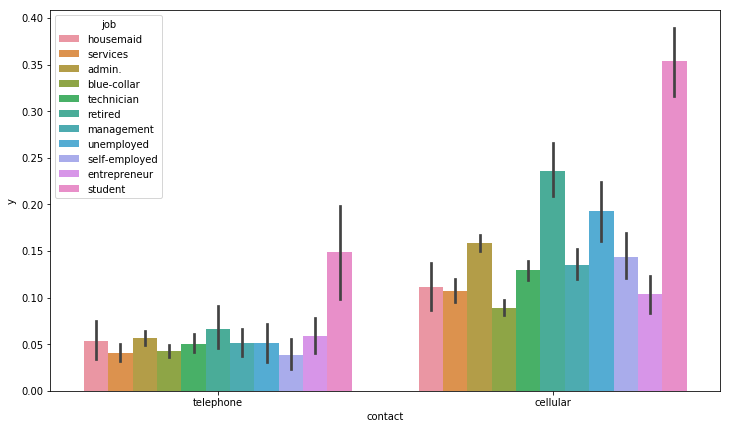

In [223]:
sns.barplot(x="contact", y="y", hue="job", data=bank_data)

The above chat shows that the overall dip on the telephone way communication then the cellular for marketing the bank's term deposit

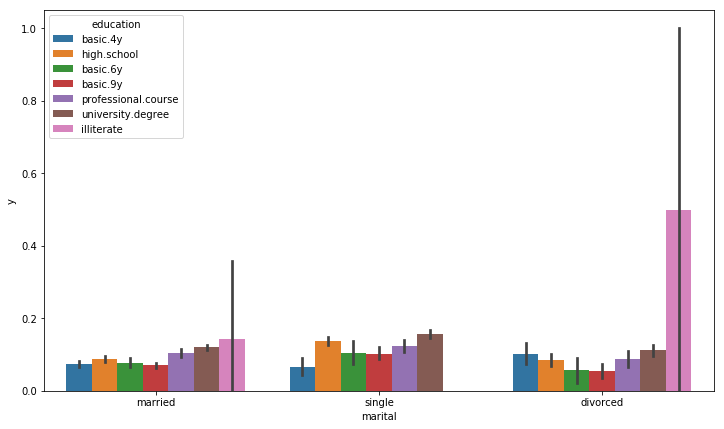

In [224]:
sns.barplot(x="marital", y="y", hue="education", data=bank_data)

The above chart shows that the divorced illeterate customer has the great impact on the bank's marketing 

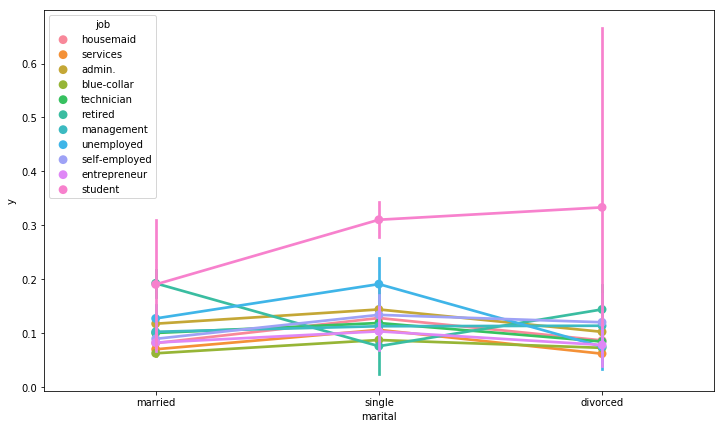

In [216]:
sns.pointplot(x="marital", y="y", hue="job", data=bank_data)

The above chart shows that divorced student has a spike and the single technician has the dip on it

### Exporting the dataframe to csv for Part B analysis

In [236]:
bank_data.to_csv('parta', sep='\t', encoding='utf-8',index=False)

# EDA Summary

<B>Data cleaning</B>

1. Are there missing values? (10 %) <br>
    There are no missing values in columns <br><br>
 
2. Are there inappropraite values? (10 %) <br>
    There are no inappropraite value in the columns <br><br>

3. Remove or impute any bad data. (10 %) <br>
    There were some value which does not make sense to the date like 'unknown' <br>
    These unknown values are replaced with Mode value of the column <br> <br>

<B>Answer the following questions for the data in each column: <br></B>

4. How is the data distributed? (10 %) <br>
    The data has been distributed over the bank customers whether they have taken term deposit or not through the marketing campaign. Majority of the customers nearly 88.8% have not taken the term deposit. Only 11.2% of customers are taken the term deposits <br> <br>

5. What are the summary statistics? (10 %) <br>
    According to the analysis the overall bank's marketing strategy does not provide a positve growth on the customer side as majority of the customers have not showsed there interest on opening a term deposit<br> <br>

6. Are there anomalies/outliers? (10 %) <br><br>
    There are three columns in the table which has outlier nearly 7500 records overall. so if we remove the records there will be high reduction on the data, so those three columns has been removed from the table. Apart from this there were two columns with outliers of approximately 450 records each, so there coresponding records has been removed from the table<br> <br>

<B>Plot each colmun as appropriate for the data type: <br></B>

7. Write a summary of what the plot tells you. (10 %) <br>
    Every chat projects a story about the data, which helps to understand the extact imformation. Those are described below every chart<br> <br>

8. Are any of the columns correlated? (10 %) <br>
    There are several columns with high correlation and those are projected in the blue color indication and decribed below the chart <br> <br>

<B>Write a clear summary of what the EDA tells you (20 %)</B>

### EDA Summary Analysis

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The data has 41188 rows with 20 input and 1 output columns.

There were no null values on the data, but several values on some of the columns are filled with a string "unkown" which is not a proper data. These unknown data have been found only on the categorial columns and those are replaced with the Mode value of the respective columns.

In analyzing on outliers there were five numeric columns which has the outliers. Among them there columns has the highest number of outliers, those columns and its count are given below  <br><br>
duration  --  2963 <br>
campaign  --  2406 <br>
pdays     --  1515 <br><br>
Since these columns has majority of count which together comes out 6884 records apart from other two columns, they have been removed completely from the table.<br>
The other two columns with outlier are given below with its count<br><br>
age  --	 469 <br>
cons.conf.idx  --  447 <br><br>
These columns are less in count, so we remove the records alone from the dataframe and can use the columns for analysis. 

After removing the bad data and outliers from the data, various analysis has been caried out here through the charts and table. The one main part is to identify the distribution of data on every column with respect to the dependent variable. Through which we could understand that how these bank's martketing transaction has been distributed over customer, like the student and illeterate has spike and technician and service orientaed customer has dip on the visual. 

Based on the analysis above on the Bank's Marketing campaign data, we could understand that the majaority of the customers 88.8% are not interested to take the term deposit from the bank and 11.2% have showed their interest. 